In [36]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random

In [37]:
def N(x, m, s):
    if x == 0:
        return 0
    return (1 / (x*s*np.sqrt(2*np.pi))) * np.exp((-(np.log(x)-m)**2)/(2*s**2))

In [38]:
def get_arg(f, min_arg, max_arg, value, eps):
    min_val, max_val = f(min_arg), f(max_arg)
    while abs(max_arg - min_arg) / max_arg > eps:
        mid_arg = (min_arg + max_arg) / 2
        mid_val = f(mid_arg)
        if mid_val < value:
            min_arg = mid_arg
            min_val = mid_val
        else:
            max_arg = mid_arg
            max_val = mid_val
    return (min_arg + max_arg) / 2

In [39]:
def get_tab(f, min_arg, max_arg, points_count):
    min_val = f(min_arg)
    max_val = f(max_arg)
    d_val = (max_val - min_val) / (points_count - 1)
    x_tab = [min_arg]
    y_tab = [min_val]
    for i in range(1, points_count - 2):
        y_tab.append(min_val + d_val * i)
        x_tab.append(get_arg(f, min_arg, max_arg, y_tab[-1], 10**(-15)))
    x_tab.append(max_arg)
    y_tab.append(max_val)
    return x_tab, y_tab

In [96]:
def model_n(x, y, p):
    for i in range(1, len(x)):
        if y[i-1] <= p <= y[i]:
            return (p - y[i]) / (y[i-1]-y[i]) * x[i-1] + (p - y[i-1]) / (y[i]-y[i-1]) * x[i]
    return x[-1]

In [89]:
def M(nums):
    return sum(nums)/len(nums)

In [90]:
def D2(nums):
    mean = M(nums)
    return (sum([i**2 for i in nums]) / len(nums) - mean**2)*len(nums)/(len(nums)-1)

In [91]:
def hist(nums, a, b, intervals):
    bins = np.linspace(a, b, intervals+1)
    counts, bins = np.histogram(nums, bins)
    return list([i/len(nums) for i in counts]), bins

In [101]:
def f(x, mat, s):
    return (1 / (s * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x) - mat) / s) ** 2)

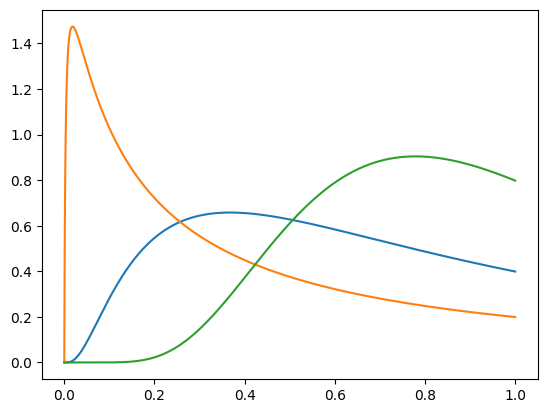

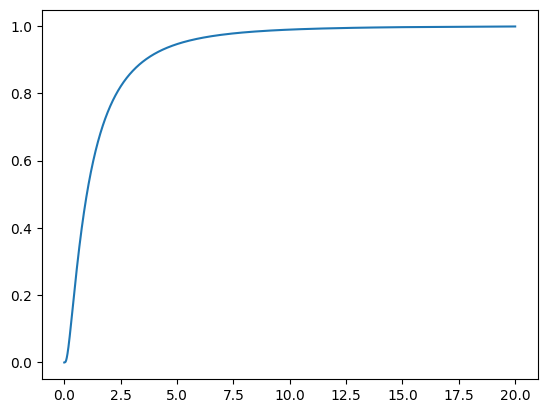

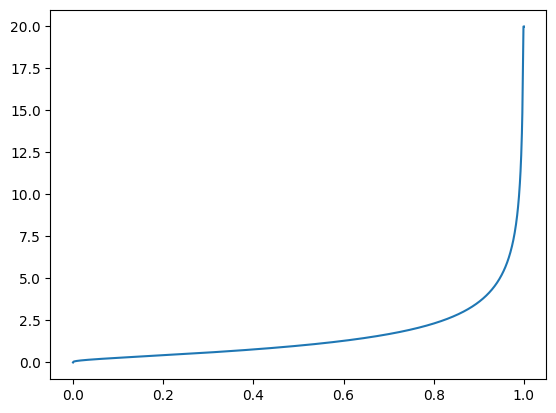

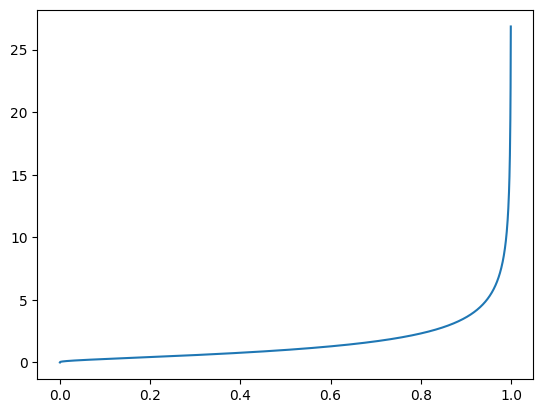

Квантиль 0.95 используя библиотеку: 5.180251602233013
Квантиль 0.95 используя обратную функцию: 5.180387877229565


In [97]:
m_array = [0, 0, 0]
sigma_array = [1, 2, 0.5]
x = np.linspace(0, 1, 2000)

for m, sigma in zip(m_array, sigma_array):
    y = [N(i, m, sigma) for i in x]
    plt.plot(x, y)

m = 0
sigma = 1
plt.figure()

cdf = lambda i: sts.lognorm.cdf(i, loc=m, s=sigma)
x_tab, y_tab = get_tab(cdf, 0, 20, 1001)
plt.plot(x_tab, y_tab)
plt.figure()

y = [model_n(x_tab, y_tab, i) for i in x]
plt.plot(x, y)
plt.figure()

plt.plot(x, [sts.lognorm.ppf(i, s=sigma, loc=m) for i in x])
plt.show()

quant = 0.95
print(f"Квантиль {quant} используя библиотеку: {sts.lognorm.ppf(quant, sigma, m)}")
print(f"Квантиль {quant} используя обратную функцию: {model_n(x_tab, y_tab, quant)}")

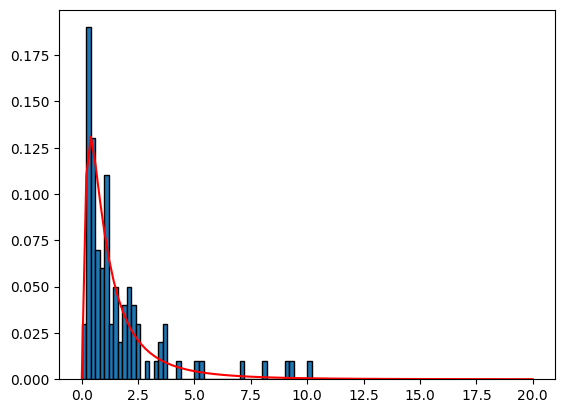

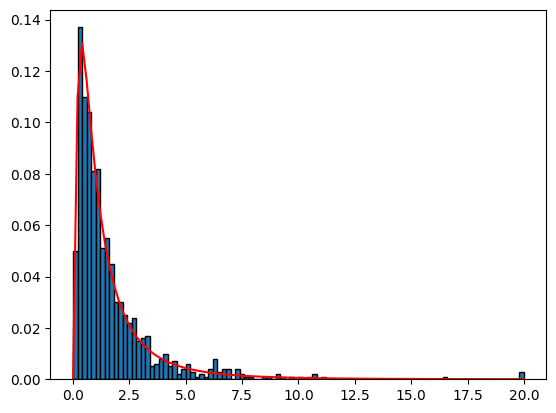

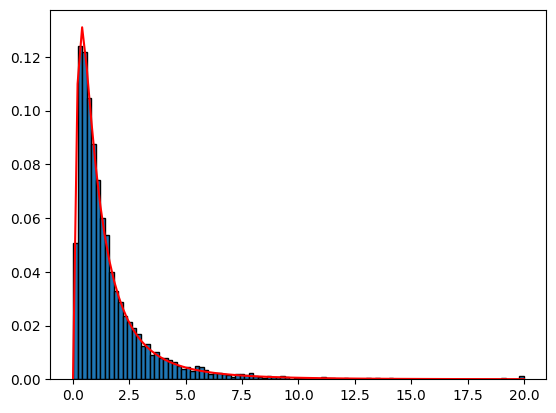

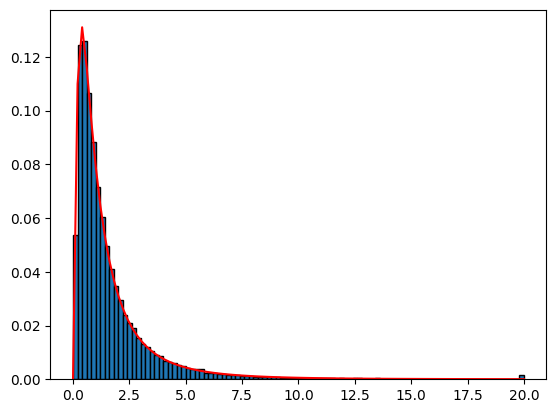

In [119]:
ammount_array = [10**2, 10**3, 10**4, 10**5]
errors = []

for ammount in ammount_array:
    nums = []
    for i in range(ammount):
        nums.append(model_n(x_tab, y_tab, random.random()))
    mid = M(nums)
    var = 4*D2(nums)**0.5
    fig, ax = plt.subplots()
    frequinces, bins = hist(nums, 0, 20, 100)
    plt.bar(bins[:-1], frequinces, align='edge', width=0.2, edgecolor="black")
    x = np.linspace(0, 20, 100)

    #norm_func = lambda i: f(i, M(nums), D2(nums)**0.5)
    norm_func = lambda i: sts.lognorm.pdf(i, loc=0, s=1)
    error = 0
    for i in range(len(x)):
        error += ((norm_func(x[i]) - frequinces[i]) ** 2) / 100
    errors.append(error)

    
    plt.plot(x, [sts.lognorm.pdf(i, loc=0, s=1) / 5 for i in x], 'r')

plt.show()

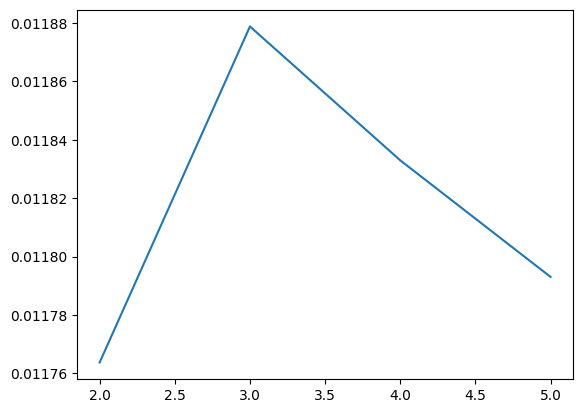

In [120]:
plt.plot([math.log(i, 10) for i in ammount_array], errors)
plt.show()

In [121]:
def M(seq):
    return sum(seq)/len(seq)

def D(seq):
    return (sum([x**2 for x in seq]) / len(seq) - M(seq) ** 2) * len(seq) / (len(seq)-1)

def S(seq):
    return D(seq) ** 0.5

In [122]:
def general_S(general):
    return (sum([(len(X)-1) * D(X) for X in general]) / (sum([len(X) for X in general]) - len(general)))**0.5

In [123]:
def grade_M_norm(x, p):
    return M(x) - sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x)), M(x) + sts.norm.ppf(1-p/2) * gen_S/math.sqrt(len(x))

In [124]:
def grade_M_student(x, p):
    return M(x) - sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x)), M(x) + sts.t.ppf(1-p/2, len(x)-1) * S(x)/math.sqrt(len(x))

In [125]:
def grade_M_chi(x, p):
    return (len(x)-1) * D(x)/(sts.chi2.ppf(1-p/2, len(x)-1)), (len(x)-1) * D(x)/(sts.chi2.ppf(p/2, len(x)-1))

In [126]:
ammount_array = [5, 10, 15, 30, 40, 50]
n = ammount_array
f = [i-1 for i in n]
sequences = []

for ammount in ammount_array:
    nums = []
    for i in range(ammount):
        nums.append(model_n(x_tab, y_tab, random.random()))
    sequences.append(nums)

In [127]:
gen_S = general_S(sequences)

In [128]:
Ms = []
Ds = []
Ss = []
gen_Ss = []

for seq in sequences:
    Ms.append(M(seq))
    Ds.append(D(seq))
    Ss.append(S(seq))

In [129]:
M_avg = sum(Ms)/len(Ms)
S_avg = math.sqrt((f[0] * Ss[0] ** 2 + f[1] * Ss[1] ** 2 + f[2] * Ss[2] ** 2 + f[3] * Ss[3] ** 2) / (sum(n) - 4)) 

In [130]:
norm_borders = []
t_borders = []
chi_borders_D = []
chi_borders_S = []
p = 0.05

for seq in sequences:
    low, high = grade_M_norm(seq, p)
    norm_borders.append((low, high))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка мат. ожидания по Нормальному закону: {low} <= M <= {high}")
    
    low, high = grade_M_student(seq, p)
    t_borders.append((low, high))
    print(f"Оценка мат. ожидания по Стьюденту: {low} <= M <= {high}")

    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 5
Мат. ожидание: 1.7075558638951338
Дисперсия: 1.7689473164321357
Среднее кв. отклонение: 1.3300177880134294
Оценка мат. ожидания по Нормальному закону: 0.2759194375113412 <= M <= 3.1391922902789267
Оценка мат. ожидания по Стьюденту: 0.05612065954824952 <= M <= 3.358991068242018
Оценка дисперсии по Хи квадрат: 0.7968577324367323 <= S <= 3.8218801081702405
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 1.5758663873646555
Дисперсия: 2.866126262650136
Среднее кв. отклонение: 1.692963751132946
Оценка мат. ожидания по Нормальному закону: 0.5635465620750002 <= M <= 2.5881862126543105
Оценка мат. ожидания по Стьюденту: 0.36479307640377723 <= M <= 2.7869396983255337
Оценка дисперсии по Хи квадрат: 1.164480071779092 <= S <= 3.0906918627048396
-------------------------------------------------------
Длина выборки: 15
Мат. ожидание: 1.1979616093444483
Дисперсия: 1.0273179879882748
Средн

In [131]:
chi_borders_D = []
chi_borders_S = []

for seq in sequences:
    low, high = grade_M_chi(seq, p)
    chi_borders_D.append((low, high))
    chi_borders_S.append((math.sqrt(low), math.sqrt(high)))
    print("-------------------------------------------------------")
    print(f"Длина выборки: {len(seq)}")
    print(f"Мат. ожидание: {M(seq)}")
    print(f"Дисперсия: {D(seq)}")
    print(f"Среднее кв. отклонение: {S(seq)}")
    print(f"Оценка дисперсии по Хи квадрат: {math.sqrt(low)} <= S <= {math.sqrt(high)}")

-------------------------------------------------------
Длина выборки: 5
Мат. ожидание: 1.7075558638951338
Дисперсия: 1.7689473164321357
Среднее кв. отклонение: 1.3300177880134294
Оценка дисперсии по Хи квадрат: 0.7968577324367323 <= S <= 3.8218801081702405
-------------------------------------------------------
Длина выборки: 10
Мат. ожидание: 1.5758663873646555
Дисперсия: 2.866126262650136
Среднее кв. отклонение: 1.692963751132946
Оценка дисперсии по Хи квадрат: 1.164480071779092 <= S <= 3.0906918627048396
-------------------------------------------------------
Длина выборки: 15
Мат. ожидание: 1.1979616093444483
Дисперсия: 1.0273179879882748
Среднее кв. отклонение: 1.0135669627549404
Оценка дисперсии по Хи квадрат: 0.742059318825647 <= S <= 1.598495455891553
-------------------------------------------------------
Длина выборки: 30
Мат. ожидание: 1.7183366275739749
Дисперсия: 3.465647103460459
Среднее кв. отклонение: 1.8616248557269692
Оценка дисперсии по Хи квадрат: 1.482610941304199

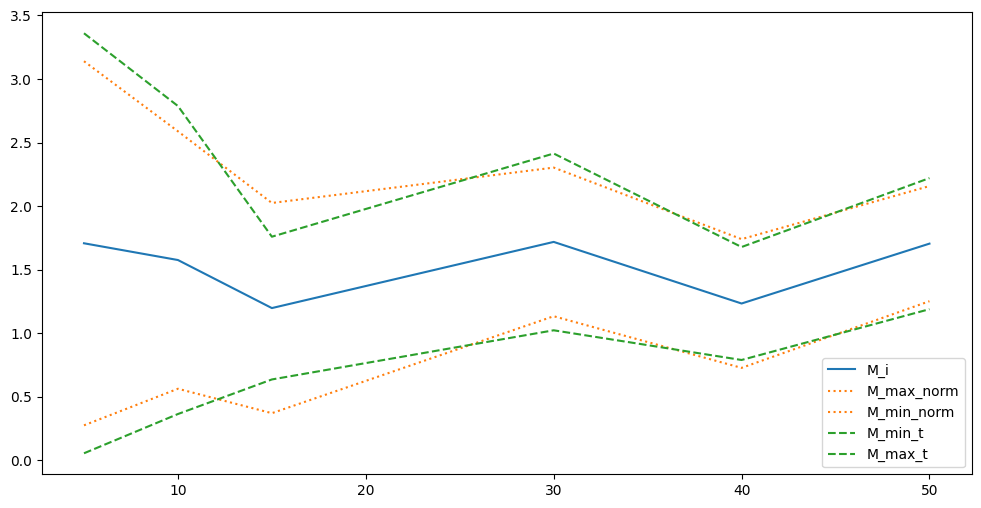

In [132]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ms, linestyle='solid', label='M_i')
plt.plot(n, list([x[0] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_max_norm')
plt.plot(n, list([x[1] for x in norm_borders]), linestyle='dotted', color='tab:orange', label='M_min_norm')

plt.plot(n, list([x[0] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_min_t')
plt.plot(n, list([x[1] for x in t_borders]), linestyle='dashed', color='tab:green', label='M_max_t')

#plt.plot(n, list(M_avg for _ in range(len(n))), linestyle='dashdot', label='M_avg', color='lightcoral')

plt.legend(loc='lower right')

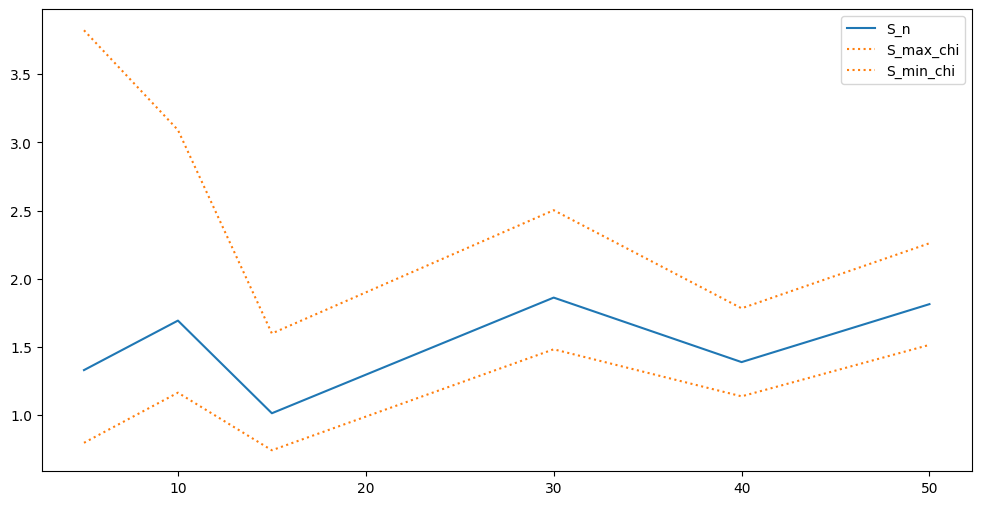

In [133]:
plt.figure(figsize=(12, 6))

plt.plot(n, Ss, linestyle='solid', label='S_n')
plt.plot(n, list([x[0] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_max_chi')
plt.plot(n, list([x[1] for x in chi_borders_S]), linestyle='dotted', color='tab:orange', label='S_min_chi')

#plt.plot(n, list(S_avg for _ in range(len(n))), linestyle='dashdot', label='S_avg', color='lightcoral')

plt.legend(loc='upper right')